In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import auc


In [2]:
prob = "MountainCarContinuous"
window_size = 10
nb_episodes = 300


In [3]:
def compute_auc_and_std(data, nb_episodes):
    # data = np.load(filepath, allow_pickle=True)
    all_returns = data['episode_rewards']  # shape: (n_seeds, n_episodes)
    # print("all_returns ", all_returns, "\n")
    
    # print("all_returns shape:", all_returns.shape, "\n")
    aucs = []
    for rewards in all_returns:
        returns = rewards[:nb_episodes]
        x = np.arange(len(returns))
        aucs.append(auc(x, returns))

    auc_mean = np.mean(aucs)
    auc_std = np.std(aucs)
    return auc_mean, auc_std


In [6]:
base_path = f"C:\\Users\\nicle\\Desktop\\QRNN-MPC\\New Files July 23\\MPC_methods_BatchNormTestJuly31"
# \\{prob}


## Plot subfigures



In [9]:
MCC_dict_auc_mean = {}
MCC_dict_auc_std = {}


QRNN-ASNN-PF: AUC = 24113.64 ± 3497.52
QRNN-basic-PF: AUC = 48592.95 ± 9890.87
50NN-ASNN-PF: AUC = 18831.43 ± 9074.43
50NN-basic-PF: AUC = 48884.63 ± 7388.13
MSENN-ASNN-PF: AUC = 23234.96 ± 971.16
MSENN-basic-PF: AUC = 48365.65 ± 1806.63
############################################################# 

QRNN-ASNN-CEM: AUC = 16966.97 ± 3014.62
smoothed_mean  0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
         ...    
295    77.296706
296    76.908111
297    70.292010
298    76.562727
299    69.931039
Length: 300, dtype: float64 

QRNN-basic-CEM: AUC = 55653.91 ± 1213.20
smoothed_mean  0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
295    192.092314
296    192.037611
297    191.822151
298    181.900493
299    181.998646
Length: 300, dtype: float64 

50NN-ASNN-CEM: AUC = 20992.30 ± 3931.21
50NN-basic-CEM: AUC = 54680.76 ± 1364.19
MSENN-ASNN-CEM: AUC = 22553.20 ± 1815.12
MSENN-basic-CEM: AUC

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\New Files July 23\\MPC_methods_BatchNormTestJuly31\\MountainCarContinuous_DQN_results.npz'

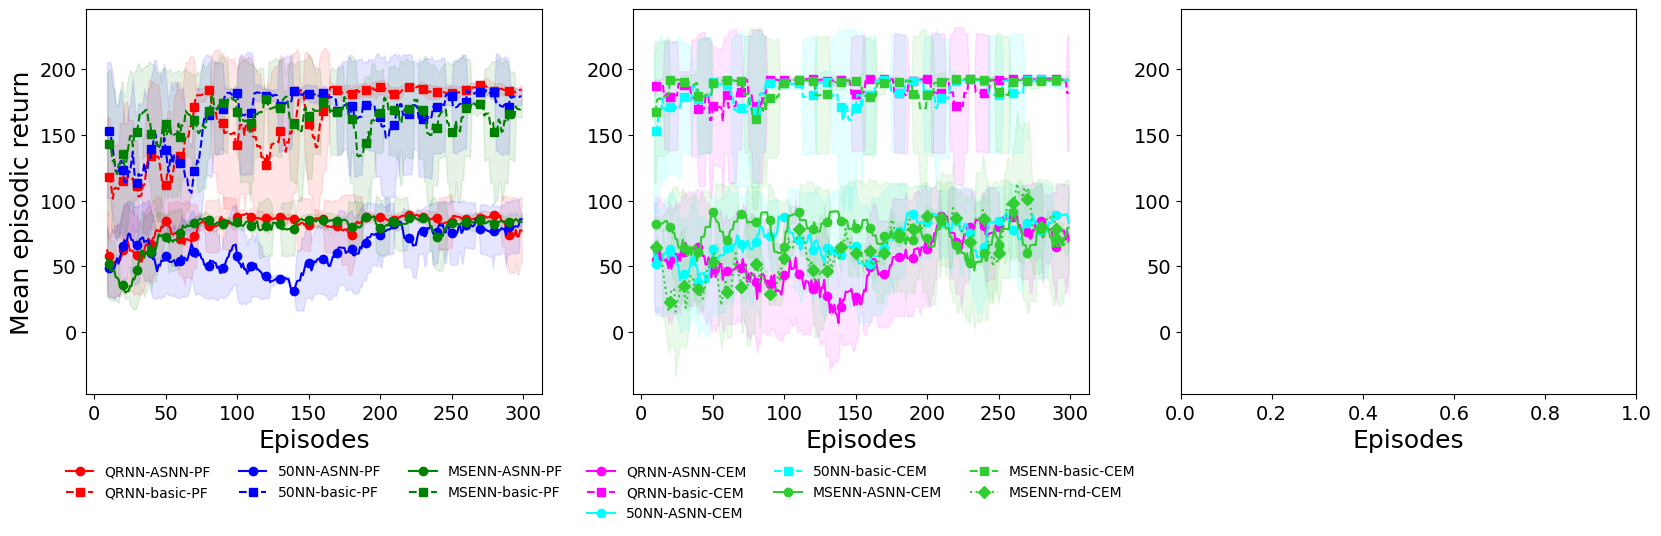

In [ ]:
fig, axs = plt.subplots(1,3, figsize=(20, 5), sharey=True)

plt.rcParams.update({'font.size': 20})
for i, ax in enumerate(axs):
    # ax.plot([1, 2, 3], [j*(i+1) for j in [1, 4, 9]])
    # ax.set_title(f"Plot {i+1}", fontsize=20)
    ax.set_xlabel("Episodes", fontsize=18)
    ax.tick_params(axis='both', labelsize=14)
    ax.yaxis.set_tick_params(labelleft=True)

axs[0].set_ylabel("Mean episodic return", fontsize=18)

QRNN = {
    'QRNN-ASNN-PF': f'{base_path}\\{prob}_MPC_QRNN_ASNN_mid_July31_4repeat.npz',
    'QRNN-basic-PF': f'{base_path}\\{prob}_MPC_QRNN_basic_mid_July31_4repeat.npz',
    # 'QRNN-rnd-PF': f'{base_path}\\{prob}_MPC_QRNN_random_mid_July31_4repeat.npz',
    # 'QRNN-RS': f'{base_path}\\{prob}_RS_mid_QRNN_July31_4repeat.npz',
    }
color = 'red'
# Assign markers and linestyles to sub-methods
markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns
it = 0
for label, filepath in QRNN.items():
    data = np.load(filepath)
    mean_rewards = data['mean_rewards'][:nb_episodes]
    std_rewards = data['std_rewards'][:nb_episodes]
    
    auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
    print(f"{label}: AUC = {auc_mean:.2f} ± {auc_std:.2f}")
    MCC_dict_auc_mean[label] = auc_mean
    MCC_dict_auc_std[label] = auc_std

    # if it == 0:
    #     print(mean_rewards)
    #     print(std_rewards)
    
    # Smooth the data
    smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
    smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
    # Plot
    axs[0].plot(smoothed_mean, 
             label=f"{label}", 
             color=color,
             marker=markers[it],
             linestyle=linestyles[it],
             markevery=10)  # Show markers every 10 points
    
    # Confidence interval (optional)
    axs[0].fill_between(range(len(mean_rewards)), 
                     smoothed_mean - smoothed_std, 
                     smoothed_mean + smoothed_std, 
                     color=color, alpha=0.1)
    it += 1
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

############################################################################

FiftyNN = {'50NN-ASNN-PF': f'{base_path}\\{prob}_MPC_50NN_ASNN_mid_July31_4repeat.npz',
    '50NN-basic-PF': f'{base_path}\\{prob}_MPC_50NN_basic_mid_July31_4repeat.npz',
    # '50NN-rnd-PF': f'{base_path}\\{prob}_MPC_50NN_random_mid_July31_4repeat.npz',
    # '50NN-RS': f'{base_path}\\{prob}_RS_mid_50NN_July31_4repeat.npz',
    }
color = 'blue'
# Assign markers and linestyles to sub-methods
markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns
it = 0
for label, filepath in FiftyNN.items():
    data = np.load(filepath)
    mean_rewards = data['mean_rewards'][:nb_episodes]
    std_rewards = data['std_rewards'][:nb_episodes]
    
    auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
    print(f"{label}: AUC = {auc_mean:.2f} ± {auc_std:.2f}")
    MCC_dict_auc_mean[label] = auc_mean
    MCC_dict_auc_std[label] = auc_std

    # if it == 0:
    #     print(mean_rewards)
    #     print(std_rewards)
    
    # Smooth the data
    smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
    smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
    # Plot
    axs[0].plot(smoothed_mean, 
             label=f"{label}", 
             color=color,
             marker=markers[it],
             linestyle=linestyles[it],
             markevery=10)  # Show markers every 10 points
    
    # Confidence interval (optional)
    axs[0].fill_between(range(len(mean_rewards)), 
                     smoothed_mean - smoothed_std, 
                     smoothed_mean + smoothed_std, 
                     color=color, alpha=0.1)
    it += 1
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

############################################################################

MSENN = {'MSENN-ASNN-PF': f'{base_path}\\{prob}_MPC_MSENN_ASNN_mid_July31_4repeat.npz',
    'MSENN-basic-PF': f'{base_path}\\{prob}_MPC_MSENN_basic_mid_July31_4repeat.npz',
    # 'MSENN-rnd-PF': f'{base_path}\\{prob}_MPC_MSENN_random_mid_July31_4repeat.npz',
    # 'MSENN-RS': f'{base_path}\\{prob}_RS_mid_MSENN_July31_4repeat.npz'
    }
color = 'green'
# Assign markers and linestyles to sub-methods
markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns
it = 0
for label, filepath in MSENN.items():
    data = np.load(filepath)
    mean_rewards = data['mean_rewards'][:nb_episodes]
    std_rewards = data['std_rewards'][:nb_episodes]
    
    auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
    print(f"{label}: AUC = {auc_mean:.2f} ± {auc_std:.2f}")
    MCC_dict_auc_mean[label] = auc_mean
    MCC_dict_auc_std[label] = auc_std

    # if it == 0:
    #     print(mean_rewards)
    #     print(std_rewards)
    
    # Smooth the data
    smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
    smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
    # Plot
    axs[0].plot(smoothed_mean, 
             label=f"{label}", 
             color=color,
             marker=markers[it],
             linestyle=linestyles[it],
             markevery=10)  # Show markers every 10 points
    
    # Confidence interval (optional)
    axs[0].fill_between(range(len(mean_rewards)), 
                     smoothed_mean - smoothed_std, 
                     smoothed_mean + smoothed_std, 
                     color=color, alpha=0.1)
    it += 1
# axs[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axs[0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3, fontsize=10, frameon=False)

# from matplotlib.lines import Line2D

# custom_legend = [
#     Line2D([0], [0], color='red', lw=2, label='QRNN'),
#     Line2D([0], [0], color='blue', lw=2, label='50NN'),
#     Line2D([0], [0], color='green', lw=2, label='MSENN'),
#     Line2D([0], [0], color='black', marker='o', linestyle='None', markersize=6, label='ASNN'),
#     Line2D([0], [0], color='black', marker='s', linestyle='None', markersize=6, label='QRNN-CEM'),
#     Line2D([0], [0], color='black', marker='^', linestyle='None', markersize=6, label='50NN-CEM')
# ]

# axs[0].legend(handles=custom_legend, loc='upper center', bbox_to_anchor=(0.5, -0.2),
#               ncol=3, fontsize=10, frameon=False)


###########################################################

print("############################################################# \n")

QRNN_CEM = {'QRNN-ASNN-CEM': f'{base_path}\\{prob}_MPC_QRNN_ASNN_mid_July31_CEM_4repeat.npz',
    'QRNN-basic-CEM': f'{base_path}\\{prob}_MPC_QRNN_basic_mid_July31_CEM_4repeat.npz',
    # 'QRNN-rnd-CEM': f'{base_path}\\{prob}_MPC_QRNN_random_mid_July31_CEM_4repeat.npz',
    }
color = 'magenta'
# Assign markers and linestyles to sub-methods
markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns
it = 0
for label, filepath in QRNN_CEM.items():
    data = np.load(filepath)
    mean_rewards = data['mean_rewards'][:nb_episodes]
    std_rewards = data['std_rewards'][:nb_episodes]
    
    auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
    print(f"{label}: AUC = {auc_mean:.2f} ± {auc_std:.2f}")
    MCC_dict_auc_mean[label] = auc_mean
    MCC_dict_auc_std[label] = auc_std

    # if it == 0:
    #     print(mean_rewards)
    #     print(std_rewards)
    
    # Smooth the data
    smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
    smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
    # print("smoothed_mean ", smoothed_mean, "\n")
    
    # Plot
    axs[1].plot(smoothed_mean, 
             label=f"{label}", 
             color=color,
             marker=markers[it],
             linestyle=linestyles[it],
             markevery=10)  # Show markers every 10 points
    
    # Confidence interval (optional)
    axs[1].fill_between(range(len(mean_rewards)), 
                     smoothed_mean - smoothed_std, 
                     smoothed_mean + smoothed_std, 
                     color=color, alpha=0.1)
    it += 1
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

########################################################

FiftyNN_CEM = {'50NN-ASNN-CEM': f'{base_path}\\{prob}_MPC_50NN_ASNN_mid_July31_CEM_4repeat.npz',
    '50NN-basic-CEM': f'{base_path}\\{prob}_MPC_50NN_basic_mid_July31_CEM_4repeat.npz',
    # '50NN-rnd-CEM': f'{base_path}\\{prob}_MPC_50NN_random_mid_July31_CEM_4repeat.npz',
    }
color = 'aqua'
# Assign markers and linestyles to sub-methods
markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns
it = 0
for label, filepath in FiftyNN_CEM.items():
    data = np.load(filepath)
    mean_rewards = data['mean_rewards'][:nb_episodes]
    std_rewards = data['std_rewards'][:nb_episodes]
    
    auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
    print(f"{label}: AUC = {auc_mean:.2f} ± {auc_std:.2f}")
    MCC_dict_auc_mean[label] = auc_mean
    MCC_dict_auc_std[label] = auc_std

    # if it == 0:
    #     print(mean_rewards)
    #     print(std_rewards)
    
    # Smooth the data
    smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
    smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
    # Plot
    axs[1].plot(smoothed_mean, 
             label=f"{label}", 
             color=color,
             marker=markers[it],
             linestyle=linestyles[it],
             markevery=10)  # Show markers every 10 points
    
    # Confidence interval (optional)
    axs[1].fill_between(range(len(mean_rewards)), 
                     smoothed_mean - smoothed_std, 
                     smoothed_mean + smoothed_std, 
                     color=color, alpha=0.1)
    it += 1
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


########################################################

MSENN_CEM = {'MSENN-ASNN-CEM': f'{base_path}\\{prob}_MPC_MSENN_ASNN_mid_July31_CEM_4repeat.npz',
    'MSENN-basic-CEM': f'{base_path}\\{prob}_MPC_MSENN_basic_mid_July31_CEM_4repeat.npz',
    'MSENN-rnd-CEM': f'{base_path}\\{prob}_MPC_MSENN_random_mid_July31_CEM_4repeat.npz',}
color = 'limegreen'
# Assign markers and linestyles to sub-methods
markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns
it = 0
for label, filepath in MSENN_CEM.items():
    data = np.load(filepath)
    mean_rewards = data['mean_rewards'][:nb_episodes]
    std_rewards = data['std_rewards'][:nb_episodes]
    
    auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
    print(f"{label}: AUC = {auc_mean:.2f} ± {auc_std:.2f}")
    MCC_dict_auc_mean[label] = auc_mean
    MCC_dict_auc_std[label] = auc_std

    # if it == 0:
    #     print(mean_rewards)
    #     print(std_rewards)
    
    # Smooth the data
    smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
    smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
    # Plot
    axs[1].plot(smoothed_mean, 
             label=f"{label}", 
             color=color,
             marker=markers[it],
             linestyle=linestyles[it],
             markevery=10)  # Show markers every 10 points
    
    # Confidence interval (optional)
    axs[1].fill_between(range(len(mean_rewards)), 
                     smoothed_mean - smoothed_std, 
                     smoothed_mean + smoothed_std, 
                     color=color, alpha=0.1)
    it += 1
# axs[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axs[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3, fontsize=10, frameon=False)

#############################################################

print("############################################################# \n")

DQN_methods = {'DQN': f'{base_path}\\{prob}_DQN_results.npz',
    'IV-DQN': f'{base_path}\\{prob}_IV_DQN_results.npz',
    'QR-DQN': f'{base_path}\\{prob}_QR_DQN_results.npz',
    }

color = 'black'
# Assign markers and linestyles to sub-methods
markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns
it = 0
for label, filepath in DQN_methods.items():
    data = np.load(filepath)
    mean_rewards = data['mean_rewards'][:nb_episodes]
    std_rewards = data['std_rewards'][:nb_episodes]
    
    # print("mean_rewards ", data['ep[]'], "\n")
    auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
    print(f"{label}: AUC = {auc_mean:.2f} ± {auc_std:.2f}")
    MCC_dict_auc_mean[label] = auc_mean
    MCC_dict_auc_std[label] = auc_std

    # if it == 0:
    #     print(mean_rewards)
    #     print(std_rewards)
    
    # Smooth the data
    smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
    smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
    # Plot
    axs[2].plot(smoothed_mean, 
             label=f"{label}", 
             color=color,
             marker=markers[it],
             linestyle=linestyles[it],
             markevery=10)  # Show markers every 10 points
    
    # Confidence interval (optional)
    axs[2].fill_between(range(len(mean_rewards)), 
                     smoothed_mean - smoothed_std, 
                     smoothed_mean + smoothed_std, 
                     color=color, alpha=0.1)
    it += 1
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

########################
########################
RL_methods = {'A2C': f'{base_path}\\{prob}_A2C_results_June27.npz',
    'PPO': f'{base_path}\\{prob}_PPO_results_June27.npz',
    # 'A2C': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_A2C_results.npz',
    # 'DDPG': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_DDPG_results.npz',
    # 'PPO': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_PPO_results.npz',
    # 'SAC': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_SAC_results.npz',
    # 'TD3': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_TD3_results.npz',
    # 'TQC': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_TQC_results.npz',
    }

color = 'purple'
# Assign markers and linestyles to sub-methods
markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
linestyles = ['-', '--', ':', '-.', ' ', '', (0, (3, 1, 1, 1))]  # Custom patterns
it = 0
for label, filepath in RL_methods.items():
    data = np.load(filepath)
    mean_rewards = data['mean_rewards'][:nb_episodes]
    std_rewards = data['std_rewards'][:nb_episodes]
    
    auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
    print(f"{label}: AUC = {auc_mean:.2f} ± {auc_std:.2f}")
    MCC_dict_auc_mean[label] = auc_mean
    MCC_dict_auc_std[label] = auc_std

    # if it == 0:
    #     print(mean_rewards)
    #     print(std_rewards)
    
    # Smooth the data
    smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
    smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
    # Plot
    axs[2].plot(smoothed_mean, 
             label=f"{label}", 
             color=color,
             marker=markers[it],
             linestyle=linestyles[it],
             markevery=10)  # Show markers every 10 points
    
    # Confidence interval (optional)
    axs[2].fill_between(range(len(mean_rewards)), 
                     smoothed_mean - smoothed_std, 
                     smoothed_mean + smoothed_std, 
                     color=color, alpha=0.1)
    it += 1

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',ncol=2)


markers = ['o', 's', 'D', '^', 'v', 'x', '*']
linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns

# QRNN-ASNN-CEM
color_QRNN_ASNN_CEM = 'magenta'
marker_QRNN_ASNN_CEM = markers[0]
linestyle_QRNN_ASNN_CEM = linestyles[0]
data = np.load(f'{base_path}\\{prob}_MPC_QRNN_ASNN_mid_ChangeHorizonTo30From70_AddedVelocity_June25_CEM.npz')
mean_rewards_QRNN_ASNN_CEM = data['mean_rewards'][:nb_episodes]
std_rewards_QRNN_ASNN_CEM = data['std_rewards'][:nb_episodes]

auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
print(f"QRNN-ASNN-CEM: AUC = {auc_mean:.2f} ± {auc_std:.2f}")

# Smooth the data
smoothed_mean_QRNN_ASNN_CEM = pd.Series(mean_rewards_QRNN_ASNN_CEM).rolling(window=window_size).mean()
smoothed_std_QRNN_ASNN_CEM = pd.Series(std_rewards_QRNN_ASNN_CEM).rolling(window=window_size).std()

# Plot
axs[2].plot(smoothed_mean_QRNN_ASNN_CEM, 
            label='QRNN-ASNN-CEM', 
            color=color_QRNN_ASNN_CEM,
            marker=marker_QRNN_ASNN_CEM,
            linestyle=linestyle_QRNN_ASNN_CEM,
            markevery=10)  # Show markers every 10 points

# Confidence interval (optional)
axs[2].fill_between(range(len(mean_rewards_QRNN_ASNN_CEM)), 
                    smoothed_mean_QRNN_ASNN_CEM - smoothed_std_QRNN_ASNN_CEM, 
                    smoothed_mean_QRNN_ASNN_CEM + smoothed_std_QRNN_ASNN_CEM, 
                    color=color_QRNN_ASNN_CEM, alpha=0.1)


# 50NN_rnd_CEM
color_50NN_rnd_CEM = 'aqua'
marker_50NN_rnd_CEM = markers[2]
linestyle_50NN_rnd_CEM = linestyles[2]
data = np.load(f'{base_path}\\{prob}_MPC_50NN_random_mid_ChangeHorizonTo30From70_AddedVelocity_June23_CEM.npz')
mean_rewards_50NN_rnd_CEM = data['mean_rewards'][:nb_episodes]
std_rewards_50NN_rnd_CEM = data['std_rewards'][:nb_episodes]

auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
print(f"50NN-rnd-CEM: AUC = {auc_mean:.2f} ± {auc_std:.2f}")

# Smooth the data
smoothed_mean_50NN_rnd_CEM = pd.Series(mean_rewards_50NN_rnd_CEM).rolling(window=window_size).mean()
smoothed_std_50NN_rnd_CEM = pd.Series(std_rewards_50NN_rnd_CEM).rolling(window=window_size).std()

# Plot
axs[2].plot(smoothed_mean_50NN_rnd_CEM, 
            label="50NN-rnd-CEM", 
            color=color_50NN_rnd_CEM,
            marker=marker_50NN_rnd_CEM,
            linestyle=linestyle_50NN_rnd_CEM,
            markevery=10)  # Show markers every 10 points

# Confidence interval (optional)
axs[2].fill_between(range(len(mean_rewards_50NN_rnd_CEM)), 
                    smoothed_mean_50NN_rnd_CEM - smoothed_std_50NN_rnd_CEM, 
                    smoothed_mean_50NN_rnd_CEM + smoothed_std_50NN_rnd_CEM, 
                    color=color_50NN_rnd_CEM, alpha=0.1)

# MSENN_basic_CEM
color_MSENN_basic_CEM = 'limegreen'
marker_MSENN_basic_CEM = markers[1]
linestyle_MSENN_basic_CEM = linestyles[1]
data = np.load(f'{base_path}\\{prob}_MPC_MSENN_basic_mid_ChangeHorizonTo30From70_AddedVelocity_June23_CEM.npz')
mean_rewards_MSENN_basic_CEM = data['mean_rewards'][:nb_episodes]
std_rewards_MSENN_basic_CEM = data['std_rewards'][:nb_episodes]

auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
print(f"MSE-basic-CEM: AUC = {auc_mean:.2f} ± {auc_std:.2f}")

# Smooth the data
smoothed_mean_MSENN_basic_CEM = pd.Series(mean_rewards_MSENN_basic_CEM).rolling(window=window_size).mean()
smoothed_std_MSENN_basic_CEM = pd.Series(std_rewards_MSENN_basic_CEM).rolling(window=window_size).std()

# Plot
axs[2].plot(smoothed_mean_MSENN_basic_CEM, 
            label="MSENN-basic-CEM", 
            color=color_MSENN_basic_CEM,
            marker=marker_MSENN_basic_CEM,
            linestyle=linestyle_MSENN_basic_CEM,
            markevery=10)  # Show markers every 10 points

# Confidence interval (optional)
axs[2].fill_between(range(len(mean_rewards_MSENN_basic_CEM)), 
                    smoothed_mean_MSENN_basic_CEM - smoothed_std_MSENN_basic_CEM, 
                    smoothed_mean_MSENN_basic_CEM + smoothed_std_MSENN_basic_CEM, 
                    color=color_MSENN_basic_CEM, alpha=0.1)


# axs[2].legend(bbox_to_anchor=(1.05, 1), loc='upper left',ncol=2)
axs[2].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3, fontsize=10, frameon=False)



In [11]:
sorted_dict = dict(sorted(MC_dict_auc_mean.items(), key=lambda item: item[1], reverse=True)[:6])
sorted_dict


{'QR-DQN': -47409.166666666664,
 'DQN': -51511.166666666664,
 'IV-DQN': -58880.666666666664,
 'QRNN-ASNN-PF': -59800.0,
 'QRNN-basic-PF': -59800.0,
 'QRNN-rnd-PF': -59800.0}

In [12]:
MC_dict_auc_mean, MC_dict_auc_std


({'QRNN-ASNN-PF': -59800.0,
  'QRNN-basic-PF': -59800.0,
  'QRNN-rnd-PF': -59800.0,
  'QRNN-RS': -59800.0,
  '50NN-ASNN-PF': -59800.0,
  '50NN-basic-PF': -59800.0,
  '50NN-rnd-PF': -59800.0,
  '50NN-RS': -59800.0,
  'MSENN-ASNN-PF': -59800.0,
  'MSENN-basic-PF': -59800.0,
  'MSENN-rnd-PF': -59800.0,
  'MSENN-RS': -59800.0,
  'QRNN-ASNN-CEM': -59800.0,
  'QRNN-basic-CEM': -59800.0,
  'QRNN-rnd-CEM': -59800.0,
  '50NN-ASNN-CEM': -59800.0,
  '50NN-basic-CEM': -59800.0,
  '50NN-rnd-CEM': -59800.0,
  'MSENN-ASNN-CEM': -59800.0,
  'MSENN-basic-CEM': -59800.0,
  'MSENN-rnd-CEM': -59800.0,
  'DQN': -51511.166666666664,
  'IV-DQN': -58880.666666666664,
  'QR-DQN': -47409.166666666664,
  'A2C': -59800.0,
  'PPO': -59800.0},
 {'QRNN-ASNN-PF': 0.0,
  'QRNN-basic-PF': 0.0,
  'QRNN-rnd-PF': 0.0,
  'QRNN-RS': 0.0,
  '50NN-ASNN-PF': 0.0,
  '50NN-basic-PF': 0.0,
  '50NN-rnd-PF': 0.0,
  '50NN-RS': 0.0,
  'MSENN-ASNN-PF': 0.0,
  'MSENN-basic-PF': 0.0,
  'MSENN-rnd-PF': 0.0,
  'MSENN-RS': 0.0,
  'QRNN-ASN

In [13]:
import json

# writing dictionary to a file as JSON
with open('C:\\Users\\nicle\\Desktop\\QRNN-MPC\\AUC_data\\MC_auc_mean.json', 'w') as f:
    json.dump(MC_dict_auc_mean, f)

with open('C:\\Users\\nicle\\Desktop\\QRNN-MPC\\AUC_data\\MC_auc_std.json', 'w') as f:
    json.dump(MC_dict_auc_std, f)


In [14]:
for key, value in MC_dict_auc_mean.items():
    print(f"{key}: {value:.2f} ± {MC_dict_auc_std[key]:.2f}")
    

QRNN-ASNN-PF: -59800.00 ± 0.00
QRNN-basic-PF: -59800.00 ± 0.00
QRNN-rnd-PF: -59800.00 ± 0.00
QRNN-RS: -59800.00 ± 0.00
50NN-ASNN-PF: -59800.00 ± 0.00
50NN-basic-PF: -59800.00 ± 0.00
50NN-rnd-PF: -59800.00 ± 0.00
50NN-RS: -59800.00 ± 0.00
MSENN-ASNN-PF: -59800.00 ± 0.00
MSENN-basic-PF: -59800.00 ± 0.00
MSENN-rnd-PF: -59800.00 ± 0.00
MSENN-RS: -59800.00 ± 0.00
QRNN-ASNN-CEM: -59800.00 ± 0.00
QRNN-basic-CEM: -59800.00 ± 0.00
QRNN-rnd-CEM: -59800.00 ± 0.00
50NN-ASNN-CEM: -59800.00 ± 0.00
50NN-basic-CEM: -59800.00 ± 0.00
50NN-rnd-CEM: -59800.00 ± 0.00
MSENN-ASNN-CEM: -59800.00 ± 0.00
MSENN-basic-CEM: -59800.00 ± 0.00
MSENN-rnd-CEM: -59800.00 ± 0.00
DQN: -51511.17 ± 5841.99
IV-DQN: -58880.67 ± 970.76
QR-DQN: -47409.17 ± 3416.06
A2C: -59800.00 ± 0.00
PPO: -59800.00 ± 0.00
